# Machine Learning: Exercise session 04

In this exercise session we will focus on Ridge and Lasso regression. You will learn how to fit, predict, and cross-validate these models.

In the first problem, we will continue using the housing dataset where we added several interaction terms, and one additional variable named `X1`. You can download the data from Moodle in this week's section.

The second problem is theoretical and not due for hand-in. There, we will derive the closed-form solution for the Ridge regression (notice that Lasso regression has no closed-form solution).

## Problem 1

### 0. Load data and create a test set

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

* Import the clean housing dataset with `pd.read_csv` and take a quick look at it, to verify that it is in the desired shape (display the dataframe, check its "infos").

In [3]:
df=pd.read_csv("housing_interactions.csv")

In [4]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20417 entries, 0 to 20416
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   median_house_value                        20417 non-null  int64  
 1   ocean_proximity_enc                       20417 non-null  int64  
 2   longitude                                 20417 non-null  float64
 3   latitude                                  20417 non-null  float64
 4   housing_median_age                        20417 non-null  float64
 5   median_income                             20417 non-null  float64
 6   rooms_per_bedroom                         20417 non-null  float64
 7   rooms_per_household                       20417 non-null  float64
 8   people_per_household                      20417 non-null  float64
 9   X1                                        20417 non-null  float64
 10  longitude:latitude                

* Separate the dataframe into the features `X` and the target variable `y`: (remember, we want to predict the median house value, given the other variables)

In [16]:
X = df.drop('median_house_value',axis=1).copy()
Y = df[["median_house_value"]]

* Using the function `train_test_split`, split the dataset into training and test set. Set `test_size = 0.95` and `random_state = 12`. 

*Notice that we choose a very large fraction of test data because we want to see whether the Ridge and Lasso regression can handle the high-dimensional setting.*

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=.95, random_state=12)

### 1. Define models

* Using the class `Ridge` from `sklearn.linear_model`, instantiate a ridge regression object with penalty parameter equal to 0.1. Furthermore, set `fit_intercept=True`, and `normalize=True`. Call this object `ridge_reg`.

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, fit_intercept=True, normalize= True)


* Using the class `Lasso` from `sklearn.linear_model`, instantiate a ridge regression object with penalty parameter equal to 0.1. Furthermore, set `fit_intercept=True`, `normalize=True`, and `max_iter=1e5`. Call this object `lasso_reg`.

In [19]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1, fit_intercept= True, normalize = True, max_iter=1e5)

What is the role of the option `fit_intercept`?
*The idea is too ask lasso to add the beta0 (the intercept) to its penality term*.

### 2. Fit Ridge regression

* Fit the ridge regression on the training data previously created.

In [20]:
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.1, normalize=True)

* Compute the root mean square error of the fitted model on both the training and test set. What do you observe?
Plus grand erreur de prédiction sur le testing data set que le training. Mais pas égal à 0 pour le training, car ridge empêche overfitting.

In [21]:
from sklearn.metrics import mean_squared_error
mse_train_ridge=mean_squared_error(y_train, ridge_reg.predict(x_train), squared=False)
mse_train_ridge

67321.22364724301

In [22]:
mse_test_ridge=mean_squared_error(y_test, ridge_reg.predict(x_test), squared=False)
mse_test_ridge

74840.4663947116

In [23]:
# R^2: 1 - E[(Y - Y_hat)^2]/E[(Y - E[Y])^2] 
# (proportion of variability of Y explained by fitted model)
1 - mean_squared_error(y_test, ridge_reg.predict(x_test)) / np.var(y_test)

median_house_value    0.579334
dtype: float64

### 4. Plot Ridge regression coefficients

We now want to plot the coefficients of the ridge regression for different values of the penalty parameter.

* Create a grid, named `grid`, of penalty values ranging from `1e-4` to `1e4`.

In [24]:
from sklearn.model_selection import GridSearchCV, KFold
# grid = np.arange(1e-4, 1e4, 100)
grid=np.array([1e-4*10**k for k in range(9)]) #why like this ?


* Fill in the `??` below.

In [25]:
coefs_ridge = []
for alph in grid:
    ridge_reg.set_params(alpha= alph)
    ridge_reg.fit(x_train, y_train) #train ou test? train ! Choisir l'hyperparameter fait partie du training.
    coefs_ridge.append(ridge_reg.coef_[0])

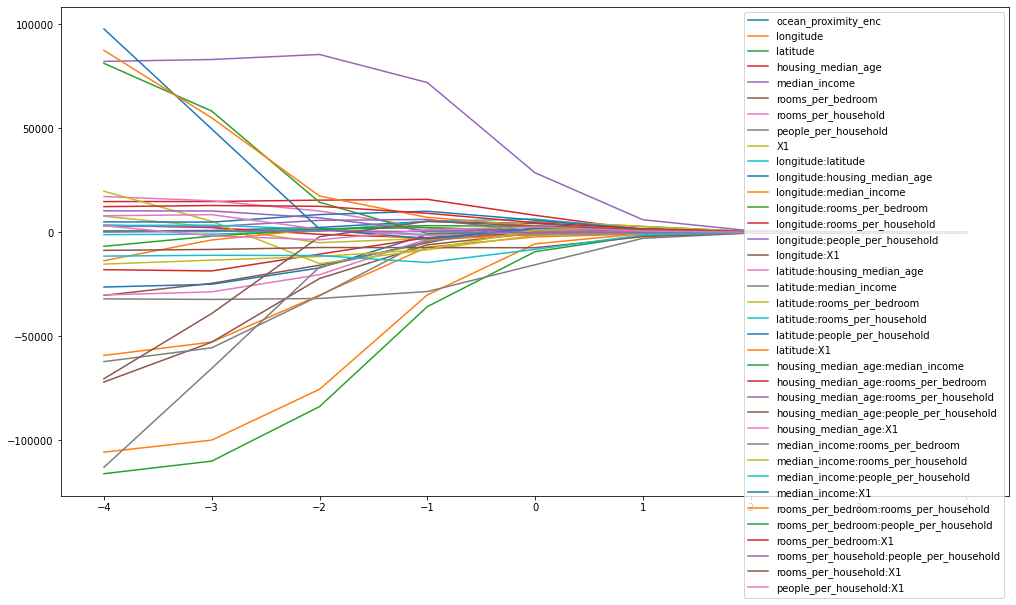

In [26]:
plt.figure(figsize=(17,9))
plt.plot(np.log10(grid), coefs_ridge)
plt.legend(X.columns)

### 5. Fit Lasso regression

* Fit the lasso regression on the training data previously created.

In [27]:
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=100000.0, normalize=True)

* Compute the root mean square error of the fitted model on both the training and test set. What do you observe?

In [28]:
mse_train_lasso=mean_squared_error(y_train, lasso_reg.predict(x_train), squared=False)
mse_train_lasso

61113.999088829805

In [29]:
mse_train_lasso/mse_train_ridge*100

90.77969142251709

*mse on train with lasso is $96\%$ of the ridge mse. So they are fairly similar*

In [30]:
mse_test_lasso=mean_squared_error(y_test, lasso_reg.predict(x_test), squared=False)
mse_test_lasso

73673.65302368117

In [31]:
mse_test_lasso/mse_test_ridge*100

98.44093252321997

*mse on test with lasso is $104\%$ of the ridge mse. So they are fairly similar*

### 6. Plot Lasso coefficients

As above, we want to plot the coefficients of the lasso regression for different values of the penalty parameter.

* Fill in the `??` below.

In [32]:
coefs_lasso = []
for alph in grid:
    lasso_reg.set_params(alpha=alph)
    lasso_reg.fit(x_train, y_train) #train or test?
    coefs_lasso.append(lasso_reg.coef_)

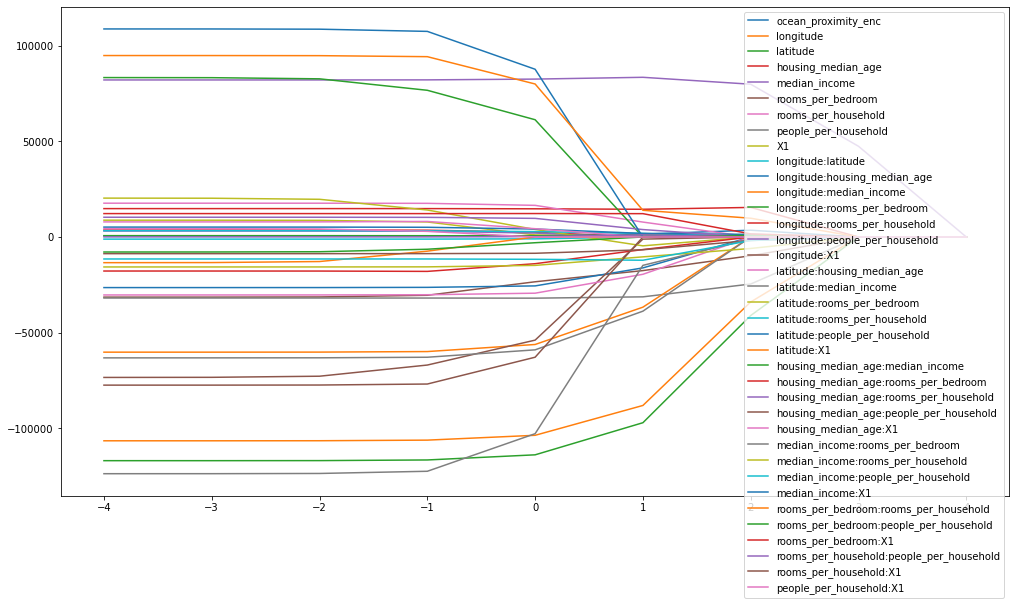

In [33]:
plt.figure(figsize=(17,9))
plt.plot(np.log10(grid), coefs_lasso)
plt.legend(X.columns)

### 7. Prepare CV

At this point, we want to find the optimal penalty parameter for our models.
We will use 10-fold cross-validation.

* Using the `KFold` class from `sklearn.model_selection` and instatiate an object named `folds`. Set the number of splits equal to 10, the random seed equal to 42, and make sure to shuffle the rows.

In [34]:
from sklearn.model_selection import KFold
folds=KFold(n_splits=10, shuffle=True, random_state=42)


### 8. CV for Ridge

* Define a grid of penalty parameters for the ridge regression. You can use the same values used for the grid above. Name the object `ridge_grid`.

In [121]:
ridge_grid=grid

* Create a dictionary with the key-value pair `"alpha"`, `ridge_grid`. What is the use of this object?

In [122]:
hyper_parameters={"alpha" : ridge_grid}

*It will be used to test different alpha values of the ridge fit.*

* Import the class `GridSearchCV` from `sklearn.model_selection` and use it to instantiate a **cross-validation object** for the ridge regression. Make sure to include the following parameters: `estimator`, `param_grid`, `scoring`, `cv`.

In [123]:
from sklearn.model_selection import GridSearchCV
ridge_cv=GridSearchCV(estimator=ridge_reg, param_grid=hyper_parameters, scoring="neg_mean_squared_error",
                       cv=folds)

* Run the cross-validation by calling the `fit` method of the **cross-validation object** that you created at the point before.

In [124]:
ridge_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(alpha=10000.0, normalize=True),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='neg_mean_squared_error')

* We want to plot the cross-validation error against different values of the penalty parameter. Fill in the `??`.

In [125]:
mean_scores = -ridge_cv.cv_results_["mean_test_score"]
std_scores = ridge_cv.cv_results_["std_test_score"]
alphas = np.array([k for k in ridge_cv.cv_results_["param_alpha"].data]) 

best_index = np.argmin(mean_scores) # index of the alpha with the lowest MSE estimate
min_alpha_ridge = ridge_grid[best_index]
print("Minimum alpha:", min_alpha_ridge)



Minimum alpha: 0.01


In [126]:
ridge_cv.cv_results_

{'mean_fit_time': array([0.00199947, 0.00219951, 0.00209992, 0.0020998 , 0.00220015,
        0.00200002, 0.0019994 , 0.00209982, 0.00214431]),
 'std_fit_time': array([9.48893964e-07, 4.00078797e-04, 2.99955153e-04, 3.00233840e-04,
        4.00114361e-04, 7.91104318e-07, 8.22112067e-07, 2.99907451e-04,
        3.14467299e-04]),
 'mean_score_time': array([0.00150046, 0.00140052, 0.00160007, 0.00150015, 0.00149984,
        0.00159991, 0.00150063, 0.00140009, 0.00145566]),
 'std_score_time': array([0.00049963, 0.00049023, 0.00049016, 0.00050037, 0.00049987,
        0.00049037, 0.0004998 , 0.00048995, 0.00047288]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                    10000.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1.0},
  {

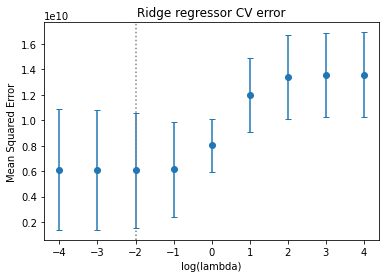

In [127]:
plt.errorbar(x = np.log10(alphas), y = mean_scores, yerr = std_scores, fmt='o', capsize=3)

plt.axvline(np.log10(min_alpha_ridge), ls='dotted', color="grey")#vertical line at the k yielding minimum CV MSE

plt.title("Ridge regressor CV error")
plt.xlabel('log(lambda)')
plt.ylabel('Mean Squared Error')
plt.show()

### 9. CV for Lasso

* Define a grid of penalty parameters for the lasso regression. You can use the same values used for the grid above. Name the object `lasso_grid`.

In [128]:
lasso_grid=ridge_grid

* Create a dictionary with the key-value pair `"alpha"`, `lasso_grid`. What is the use of this object?

In [129]:
hyper_parameters_lasso = {"alpha": lasso_grid}

* Import the class `GridSearchCV` from `sklearn.model_selection` and use it to create a **cross-validation object** for the lasso regression. Make sure to include the following parameters: `estimator`, `param_grid`, `scoring`, `cv`.

In [130]:
from sklearn.model_selection import GridSearchCV
lasso_cv=GridSearchCV(estimator=lasso_reg, param_grid=hyper_parameters_lasso, scoring = "neg_mean_squared_error", cv = folds)


* Run the cross-validation by calling the `fit` method of the **cross-validation object** that you created at the point before.

In [131]:
lasso_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(alpha=10000.0, max_iter=100000.0, normalize=True),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='neg_mean_squared_error')

* We want to plot the cross-validation error against different values of the penalty parameter. Fill in the `??`.

In [132]:
# Choose best model according to 1-se rule
mean_scores = -lasso_cv.cv_results_["mean_test_score"]
std_scores = lasso_cv.cv_results_["std_test_score"]
alphas = lasso_cv.cv_results_["param_alpha"].data
alphas = pd.to_numeric(alphas)

best_index = np.argmin(mean_scores)
min_alpha_lasso = alphas[best_index]
print("Minimum alpha:", min_alpha_lasso)

Minimum alpha: 100.0


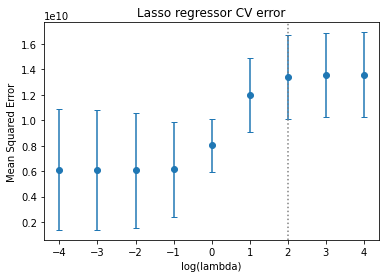

In [133]:
plt.errorbar(x=np.log10(alphas),  y=-ridge_cv.cv_results_["mean_test_score"], yerr = ridge_cv.cv_results_["std_test_score"], fmt='o', capsize=3)

plt.axvline(np.log10(min_alpha_lasso), ls='dotted', color="grey")#vertical line at the k yielding minimum CV MSE

plt.title("Lasso regressor CV error")
plt.xlabel('log(lambda)')
plt.ylabel('Mean Squared Error')
plt.show()

### 10. Compute performance of the two best models

* Given the optimal tuning parameter of the ridge and lasso regression, refit both models on the entire training data set. Furthermore, compute their root mean square error on the test set. How do they compare to the errors obtained before performing the cross-validation?

_Hint_: As optimal tuning parameter, choose the one that minimizes the Mean Squared Error and not the one according to the 1-standard error rule.

In [137]:
# Refit ridge on training and evaluate on test
best_ridge_reg=Ridge(alpha=min_alpha_ridge, fit_intercept= True, normalize = True, max_iter=1e5)
best_ridge_reg.fit(x_train,y_train)

final_mse_test_ridge=mean_squared_error(y_test, best_ridge_reg.predict(x_test), squared=False)
print("the score of the ridge regression with the best hyperparameter is:", final_mse_test_ridge, "while when not choosing the best hyperparameter, its score was",mse_test_ridge)

the score of the ridge regression with the best hyperparameter is: 109111.5796958265 while when not choosing the best hyperparameter, its score was 106065.35468065333


In [136]:
# Refit lasso on training and evaluate on test
best_lasso_reg=Lasso(alpha=min_alpha_lasso, fit_intercept= True, normalize = True, max_iter=1e5)
best_lasso_reg.fit(x_train,y_train)

final_mse_test_lasso=mean_squared_error(y_test, best_lasso_reg.predict(x_test), squared=False)
print("the score of the lasso regression with the best hyperparameter is:", final_mse_test_lasso, "while when not choosing the best hyperparameter, its score was",mse_test_lasso)

the score of the lasso regression with the best hyperparameter is: 98450.78499163415 while when not choosing the best hyperparameter, its score was 109783.18230244677


## Problem 2

In this problem, you are asked to derive the closed-form solution for the ridge regression coefficients.

Let $\mathbf{X}\in\mathbb{R}^{n\times p}$ denote the matrix of predictors, and let $\mathbf{y}\in\mathbb{R}^n$ denote the target vector.

The optimal ridge regression coefficient vector $\beta^*$, with parameter $\lambda > 0$, is defined as

$$\beta^* := \arg\min_{\beta\in\mathbb{R}^p} \ (\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y} - \mathbf{X}\beta) + \lambda \beta ^T\beta.$$

Show that 


$$\beta^*  = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I}_p)^{-1} \mathbf{X}^T \mathbf{y},$$

where $\mathbf{I}_p$ denote the identity matrix of size $p\times p$.

$\newcommand{\mby}{\mathbf{y}}$
We want to find the $β^*$ such that $(\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y} - \mathbf{X}\beta) + \lambda \beta ^T\beta.$ is minimized. For this, we first compute $\frac{\partial}{\partial β}\left((\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y} - \mathbf{X}\beta) + \lambda \beta ^T\beta\right)$:

$\begin{align*}
\frac{\partial}{\partial β}\left((\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y} - \mathbf{X}\beta) + \lambda \beta ^T\beta\right) &= \frac{\partial}{\partial β}\left(\mathbf{y}^T\mathbf{y}-\mathbf{y}^T\mathbf{X}β-β^T\mathbf{X}^T\mathbf{y}+β^T\mathbf{X}^T\mathbf{X}β+λβ^Tβ\right)\\
&=-\mathbf{y}^T\mathbf{X}-\underbrace{\mathbf{y}^T\mathbf{X}}_{\frac{\partial}{\partial β}(β^tA)=A^T}+\underbrace{2\mathbf{X}^T\mathbf{X}β}_{\frac{\partial}{\partial β}((Aβ)^TAβ)=2Aβ} +2λβ\\
&=-2\mathbf{y}^T\mathbf{X}+2\mathbf{X}^T\mathbf{X}β +2λ
\end{align*}$
Now we equate it to $0$:
$\begin{align*}
-2\mathbf{y}^T\mathbf{X}+2\mathbf{X}^T\mathbf{X}β +2λβ&=0\\
\Leftrightarrow-\mathbf{y}^T\mathbf{X}+\mathbf{X}^T\mathbf{X}β +λβ&=0\\
\Leftrightarrow \left(\mathbf{X}^T\mathbf{X}+λId_{p}\right)β=\mathbf{y}^T\mathbf{X}\\
\Leftrightarrow β=\left(\mathbf{X}^T\mathbf{X}+λId_{p}\right)^{-1}\mathbf{y}^T\mathbf{X}
\end{align*}$

We then check that $\frac{\partial}{\partial β^T}\left(-2\mathbf{y}^T\mathbf{X}+2\mathbf{X}^T\mathbf{X}β +2λβ\right)$ is positive definite:
$$\frac{\partial}{\partial β^T}\left(-2\mathbf{y}^T\mathbf{X}+2\mathbf{X}^T\mathbf{X}β +2λβ\right)=2\mathbf{X}\mathbf{X}^T +2λId_{p}$$

And so
$$\mathbf{v}^T\left(2\mathbf{X}\mathbf{X}^T +2λId_{p}\right)\mathbf{v}=2\underbrace{\mathbf{v}^T\mathbf{X}\mathbf{X}^T\mathbf{v}}_{=||\mathbf{X}^Tv||^2>0}+2\underbrace{λ}_{>0}\overbrace{v^Tv}^{=||v||^2>0}>0$$